##### The classification goal is to predict if the client will subscribe a term deposit using any classification
algorithm along with the application of PCA. Find out the optimal number of components and draw
a 3D plot of 3 PC’s.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# read the csv file
bank = pd.read_csv('bank-additional-full.csv', sep= ';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
bank['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [7]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
bank.default.replace(('yes','no'),(1,0),inplace=True)
bank.housing.replace(('yes','no'),(1,0),inplace=True)
bank.loan.replace(('yes','no'),(1,0),inplace=True)
bank.y.replace(('yes','no'),(1,0),inplace=True)

print(bank.shape)
bank.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [9]:
for i in range(len(bank.marital.unique())):
     bank["marital_"+str(bank.marital.unique()[i])] = (bank.marital == bank.marital.unique()[i]).astype(int)
    
for j in range(len(bank.job.unique())):
    bank["job_"+str(bank.job.unique()[j])] = (bank.job == bank.job.unique()[j]).astype(int)
    
for k in range(len(bank.contact.unique())):
    bank["contact_"+str(bank.contact.unique()[k])] = (bank.contact == bank.contact.unique()[k]).astype(int)

for l in range(len(bank.education.unique())):
    bank['education_'+str(bank.education.unique()[l])] = (bank.education == bank.education.unique()[l]).astype(int)

for n in range(len(bank.month.unique())):
    bank['month_'+str(bank.month.unique()[n])] = (bank.month == bank.month.unique()[n]).astype(int)



print(bank.describe())
print(bank.head())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.628198      1.734447   
min       -3.400000      

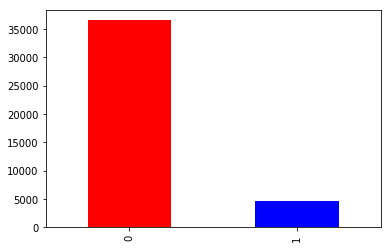

In [10]:
# sns.pairplot(bank)

deposit = bank['y'].value_counts()
deposit.plot(kind='bar', color=["red",'blue'])

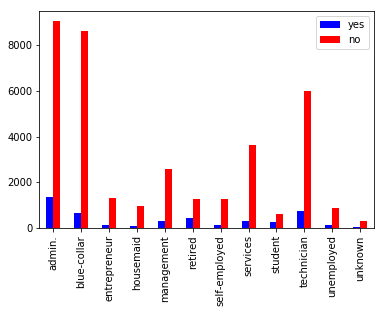

In [11]:
jobyes = bank['job'][bank.y==1].value_counts()
jobno = bank['job'][bank.y==0].value_counts()
job = pd.concat([jobyes,jobno],axis=1)
job.columns = ['yes','no']
job.plot(kind='bar', color=["blue",'red'])

Text(0.5, 0, 'Housing')

<Figure size 432x288 with 0 Axes>

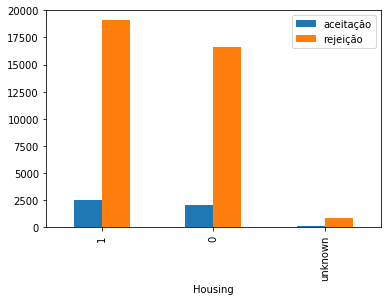

In [12]:
housing_yes = bank['housing'][bank.y==1].value_counts()
housing_no = bank['housing'][bank.y==0].value_counts()
housing=pd.concat([housing_yes,housing_no],axis=1)
plt.figure()
housing.columns=['aceitação','rejeição']
housing.plot(kind='bar')
plt.xlabel('Housing')

Text(0.5, 0, 'loan')

<Figure size 432x288 with 0 Axes>

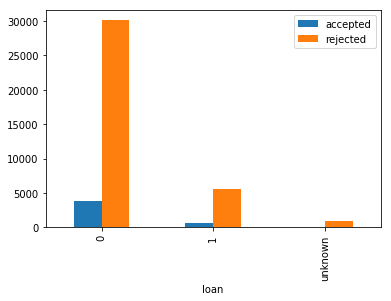

In [13]:
loan_yes = bank['loan'][bank.y==1].value_counts()
loan_no = bank['loan'][bank.y==0].value_counts()
loan = pd.concat([loan_yes,loan_no],axis=1)
plt.figure()
loan.columns=['accepted','rejected']
loan.plot(kind='bar')
plt.xlabel('loan')

In [14]:
jobbyhousing = pd.crosstab(bank['job'],bank['housing'])
jobbyhousing

housing,0,1,unknown
job,,,
admin.,4636,5559,227
blue-collar,4304,4710,240
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,784,892,44
self-employed,641,740,40
services,1818,2050,101
student,381,471,23


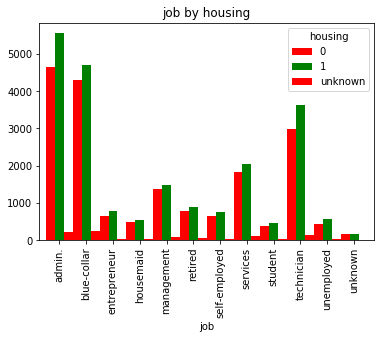

In [15]:
jobbyhousing.plot(kind='bar',width=1.0, color=['red','green'], title='job by housing' ,grid=False)

In [16]:
jobbyloan = pd.crosstab(bank['job'],bank['loan'])
jobbyloan

loan,0,1,unknown
job,,,
admin.,8485,1710,227
blue-collar,7648,1366,240
entrepreneur,1214,206,36
housemaid,877,154,29
management,2414,439,71
retired,1436,240,44
self-employed,1186,195,40
services,3267,601,101
student,710,142,23


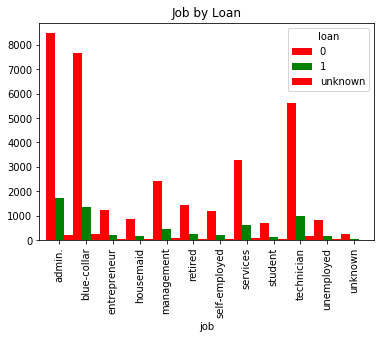

In [17]:
jobbyloan.plot(kind='bar',width=1.0, color=['red','green'], title='Job by Loan' ,grid=False)

In [18]:
bank['campaign'][bank.y==1].value_counts()

1     2300
2     1211
3      574
4      249
5      120
6       75
7       38
9       17
8       17
10      12
11      12
17       4
13       4
12       3
15       2
14       1
23       1
Name: campaign, dtype: int64

In [19]:
df=bank

<Figure size 720x1440 with 0 Axes>

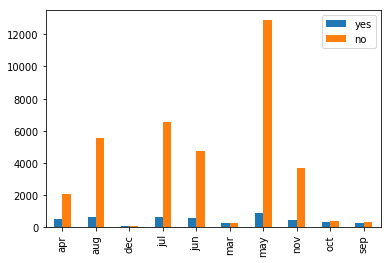

In [20]:
month_yes = df['month'][df.y==1].value_counts()
month_no = df['month'][df.y==0].value_counts()
month = pd.concat([month_yes,month_no],axis=1)
plt.figure(figsize=(10,20))
month.columns = ['yes','no']
month.plot(kind='bar')
plt.show()

<Figure size 720x1440 with 0 Axes>

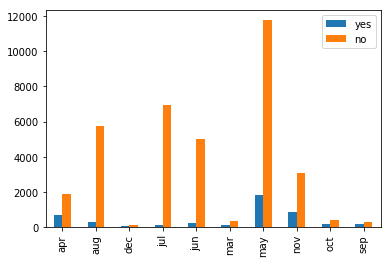

In [21]:
month_yes = df['month'][df.previous==1].value_counts()
month_no = df['month'][df.previous==0].value_counts()
month = pd.concat([month_yes,month_no],axis=1)
plt.figure(figsize=(10,20))
month.columns = ['yes','no']
month.plot(kind='bar')
plt.show()

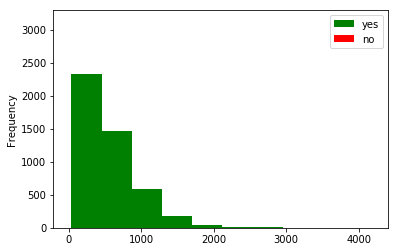

In [22]:
duration_yes = df['duration'][df.y==1]
duration_no = df['previous'][df.y==1]
plt.figure()
duration_yes.plot(kind='hist',color='green')
duration_no.plot(kind='hist',color='red')
plt.legend(['yes','no'])

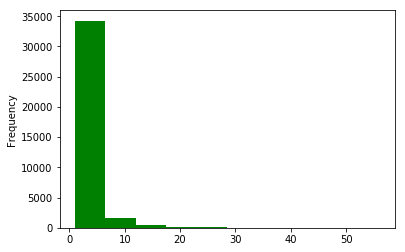

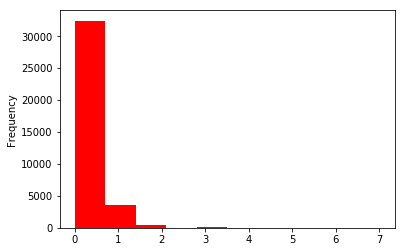

In [23]:
campaign_yes = df['campaign'][df.y==0]
campaign_no = df['previous'][df.y==0]
plt.figure()
campaign_yes.plot(kind='hist',color='green')
plt.figure()
campaign_no.plot(kind='hist',color='red')

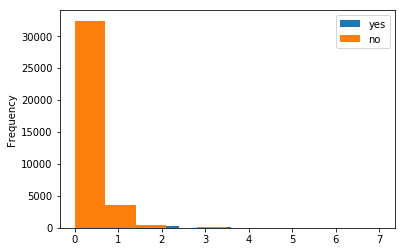

In [24]:
previous_yes = df['previous'][df.y==1]
previous_no = df['previous'][df.y==0]
plt.figure()
previous_yes.plot(kind='hist')
previous_no.plot(kind='hist')
plt.legend(['yes','no'])

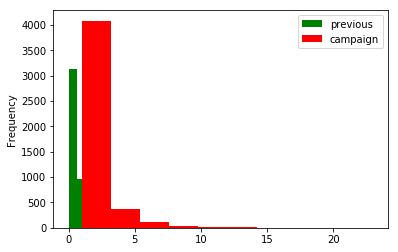

In [25]:
previous_no = df['previous'][df.y==1]
campaign_no =  df['campaign'][df.y==1]
plt.figure()
previous_no.plot(kind='hist',color='green')
campaign_no.plot(kind='hist',color='red')
plt.legend(['previous','campaign'])

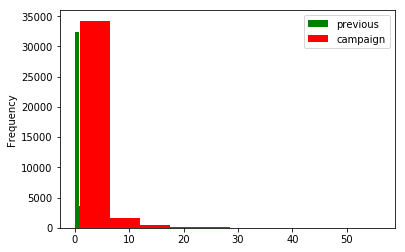

In [26]:
previous_yes = df['previous'][df.y==0]
campaign_yes =  df['campaign'][df.y==0]
plt.figure()
previous_yes.plot(kind='hist',color='green')
campaign_yes.plot(kind='hist',color='red')
plt.legend(['previous','campaign'])

In [27]:
df2 = pd.get_dummies(df, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
df2.drop(df2.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 16, 18, 21, 24]], axis=1, inplace=True)
df2.columns

Index(['cons.price.idx', 'cons.conf.idx', 'nr.employed', 'y',
       'marital_married', 'marital_divorced', 'job_housemaid', 'job_services',
       'job_blue-collar', 'job_technician', 'job_management', 'job_unemployed',
       'job_self-employed', 'job_unknown', 'job_entrepreneur', 'job_student',
       'contact_telephone', 'contact_cellular', 'education_basic.4y',
       'education_high.school', 'education_basic.6y', 'education_basic.9y',
       'education_professional.course', 'education_unknown',
       'education_university.degree', 'education_illiterate', 'month_may',
       'month_jun', 'month_jul', 'month_aug', 'month_oct', 'month_nov',
       'month_dec', 'month_mar', 'month_apr', 'month_sep', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'default_0', 'default_1', 'default_unknown',

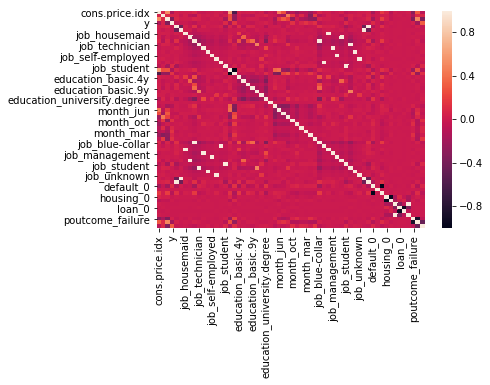

In [28]:
sns.heatmap(df2.corr())
plt.show()

In [29]:
print(df2.shape)
df2.head()

(41188, 60)


,cons.price.idx,cons.conf.idx,nr.employed,y,marital_married,marital_divorced,job_housemaid,job_services,job_blue-collar,job_technician,...,default_unknown,housing_0,housing_1,housing_unknown,loan_0,loan_1,loan_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
0,93.994,-36.4,5191.0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,93.994,-36.4,5191.0,0,1,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0
2,93.994,-36.4,5191.0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,93.994,-36.4,5191.0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,93.994,-36.4,5191.0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [72]:
X = df2.iloc[:,1:]
y = df2.iloc[:,0]
#y = y.reshape(y.shape[0], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(30891, 59)

In [48]:
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[23 18 10 ... 10 13 18]
continuous
multiclass
multiclass


In [50]:
classifier = LogisticRegression()
classifier.fit(X_train, training_scores_encoded)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
y_pred = classifier.predict(X_test)

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA


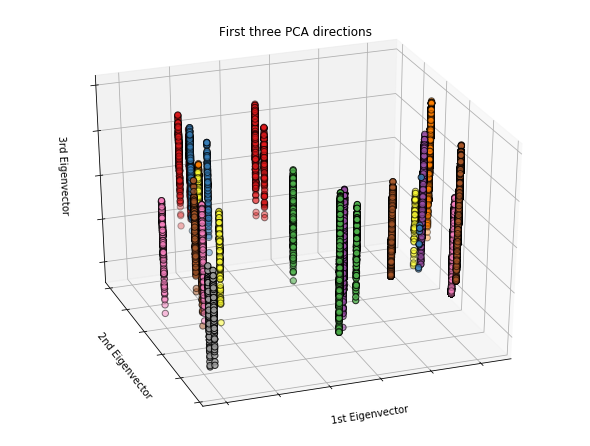

In [60]:
# For better understanding plot the first three PCA dimensions 
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
x_ = PCA(n_components=3).fit_transform(df2)
ax.scatter(x_[:, 0], x_[:, 1], x_[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st Eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

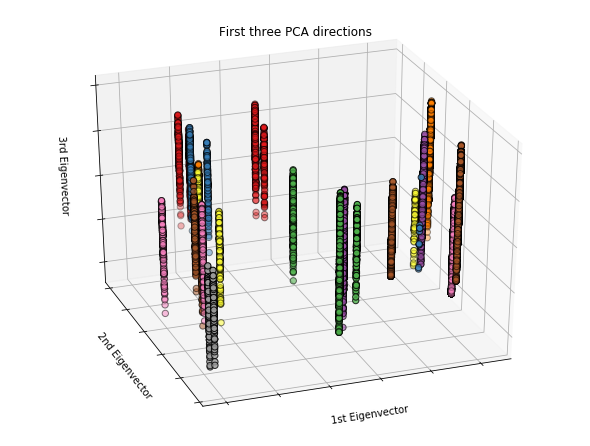

In [63]:
# For better understanding plot the first three PCA dimensions 
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
x_ = PCA().fit_transform(df2)
ax.scatter(x_[:, 0], x_[:, 1], x_[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st Eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()